In [108]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [109]:
import requests
import sys
import traceback
from getpass import getpass
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC

# Get Data

## Solana

In [110]:
solana_df = yf.download("SOL-USD", start="2021-01-01", end=datetime.today().strftime('%Y-%m-%d'))
solana_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,1.535606,1.550610,1.430263,1.510898,1.510898,12763260
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
...,...,...,...,...,...,...
2022-04-26,101.224876,101.742485,95.177895,95.782150,95.782150,1301074534
2022-04-27,95.785522,100.544930,95.283501,98.378868,98.378868,1253566599
2022-04-28,98.382149,100.401230,96.694527,98.185730,98.185730,1307131609


<AxesSubplot:xlabel='Date'>

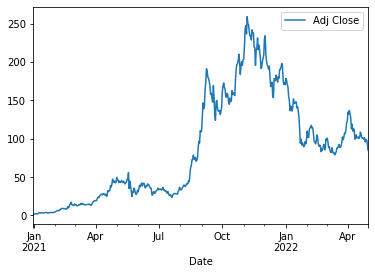

In [111]:
solana_df.plot(y = "Adj Close", use_index=True)

## Ethereum 

In [112]:
Ethereum_df = yf.download("ETH-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
Ethereum_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2554269952
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
...,...,...,...,...,...,...
2022-04-26,3008.946289,3026.415039,2786.253174,2808.298340,2808.298340,19052045399
2022-04-27,2808.645996,2911.877441,2802.273438,2888.929688,2888.929688,17419284041
2022-04-28,2888.849854,2973.135010,2861.821533,2936.940918,2936.940918,18443524633


<AxesSubplot:xlabel='Date'>

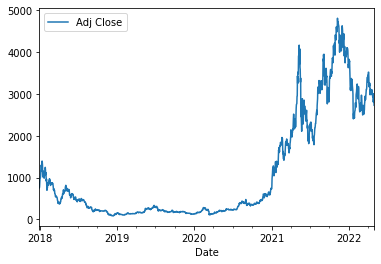

In [113]:
Ethereum_df.plot(y = "Adj Close", use_index=True)

## Rarible

In [118]:
dict_collections = {}
list_broken_urls = []
url_top_100 = 'https://api-mainnet.rarible.com/marketplace/api/v4/collections/top?days=30&size=100'
url_collections = 'https://rarible-cdn.reallm.io/collections/{}/{}?filters=%7B%7D'
broken_collection_url = 'https://rarible.com/collection/{}/stats?range=-Number.MAX_SAFE_INTEGER'
list_features = ['prices','marketcap','lowwatermark','transactions','owners','sellers', 'buyers']

def get_collections_id(url):
    json = requests.get(
        url
    ).json()

    df_id = pd.DataFrame.from_dict(json)
    df_id = df_id[['id', 'name']]
    return df_id


def get_collections_data(id, features):
    df = pd.DataFrame()
    flag = True
    for feature in features:
        tmp = pd.read_json(url_collections.format(id, feature))
        df = pd.concat([df, tmp],axis=1)
    
    return df


df_id = get_collections_id(url_top_100)

for index, row in df_id.iterrows():
    try:
        dict_collections[row['name']] = get_collections_data(row['id'], list_features)
    except:
        print("collection:", row['name'], "has not got dataset")
        print("url:", broken_collection_url.format(row['id']))
        list_broken_urls.append(broken_collection_url.format(row['id']))
        pass


collection: Otherdeed has not got dataset
collection: ENS domains has not got dataset
collection: Milady Maker has not got dataset
collection: Town Star has not got dataset
{'Moonbirds':          dates     prices_avg   prices_floor  prices_median        volume  \
0   2022-04-16   33022.436546   22349.724609   28758.234375  1.892186e+07   
1   2022-04-17   52164.876751   30291.710938   45532.609375  1.611895e+07   
2   2022-04-18   67626.703369   27939.548828   60919.421875  1.027926e+07   
3   2022-04-19   61137.580927   42797.460938   61161.925781  1.124931e+07   
4   2022-04-20   78627.213327   60904.210938   73930.054688  1.863465e+07   
5   2022-04-21  111873.229717       0.315374  104331.867188  3.445695e+07   
6   2022-04-22  109957.590738       1.501449  105502.085938  1.506419e+07   
7   2022-04-23  130624.636033   78567.906250   98929.867188  1.711183e+07   
8   2022-04-24  137914.446429  105952.960938  120318.843750  3.861604e+06   
9   2022-04-25  100563.511451   86219.79687